In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree # to plot tree in visual format 
from sklearn.metrics  import accuracy_score , confusion_matrix 

In [2]:
data_url = "https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv"

In [3]:
df=pd.read_csv(data_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [4]:
# selecting first 3 all columns data for feature (input)
features = df.iloc[:,0:3].values
# selecting last column for label / output 
labels = df.iloc[:,-1].values
print(features)
print(labels)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 nan]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'No']


In [5]:
# preprocessing 
# now for handling missing values in age and sal column
ashu_impute = SimpleImputer(strategy='mean',missing_values=np.nan)
ashu_impute.fit(features[:,1:3]) # calculating missing values 
features[:,1:3]=ashu_impute.transform(features[:,1:3]) # making changes and storing it 
print(features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [6]:
# implemnting label encoding to convert String (2 category) to numbers
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)
# note: Labelecoder -- converted NO -- 0 and Yes 1 
print(le.classes_)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]
['No' 'Yes']


In [7]:
# data preprocessing using single column having multi category
# categorical values handing in data preprocessing 
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
#     transforms[encoding,method_ofecn,columnlocaiton], keep remaining data column values unchanged
# apply it
features= ct.fit_transform(features)
print(features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [18]:
# lets split data into training and testing phase 
train_ft,test_ft,train_lb,test_lb=train_test_split(features,labels,test_size=0.2)
# size range 0 to 1 -- example if 0.1 means 10%

# Lets call DecisionTree classifier

In [14]:
# lets see internal parameter of DecisionTree CLF 
#help(DecisionTreeClassifier)

In [19]:
clf = DecisionTreeClassifier()

In [20]:
# Training classifier with small sample data
trained_model = clf.fit(train_ft,train_lb)

In [21]:
# above fit method can take time to hours as well if data is huge
# it formed Tree 

# Now testing the model to classify test data
predicted_values=trained_model.predict(test_ft)
print(predicted_values)

[0 1 1 0 0 0]


In [22]:
# what is actual values 
print(test_lb)

[0 0 1 1 0 0]


In [13]:
# checking feature and labels from classifier 
ct.get_feature_names_out()
le.classes_

array(['No', 'Yes'], dtype=object)

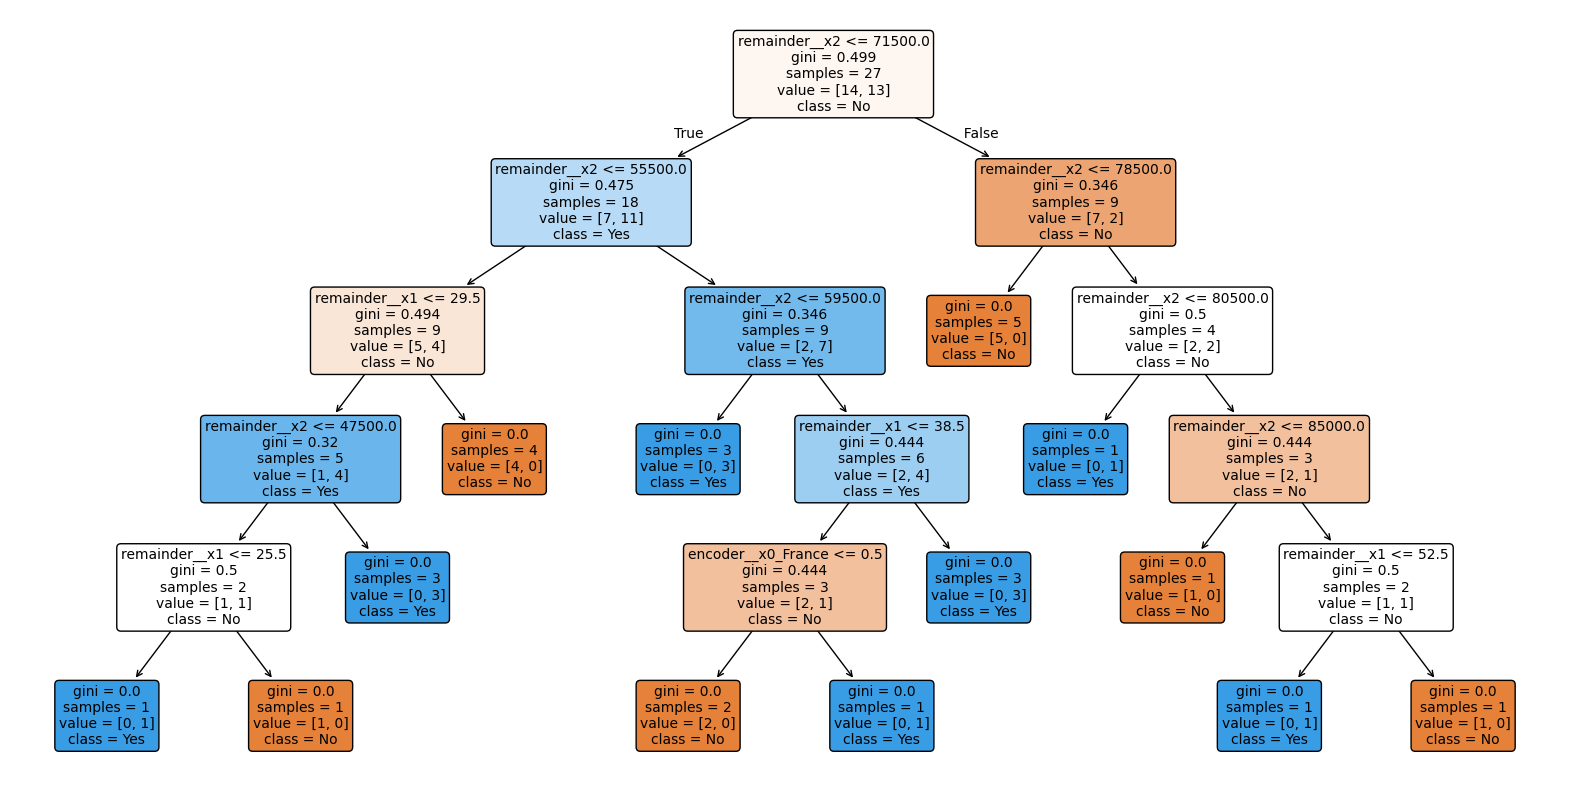

In [15]:
# lets try to visualize DecisionTree 
plt.figure(figsize=(20,10))
plt.title("DecisionTree Classifier Visualization")
plot_tree(clf,feature_names=ct.get_feature_names_out(),
          class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.show()

In [23]:
# using accuracy score
accuracy_score(test_lb,predicted_values)
# output you gonna see -- 0.0  to 1.0 
# lets say if 0.66 is output which means model is 66% accurate
# 1.0 means 100% 

0.6666666666666666

In [24]:
confusion_matrix(test_lb,predicted_values)

array([[3, 1],
       [1, 1]])